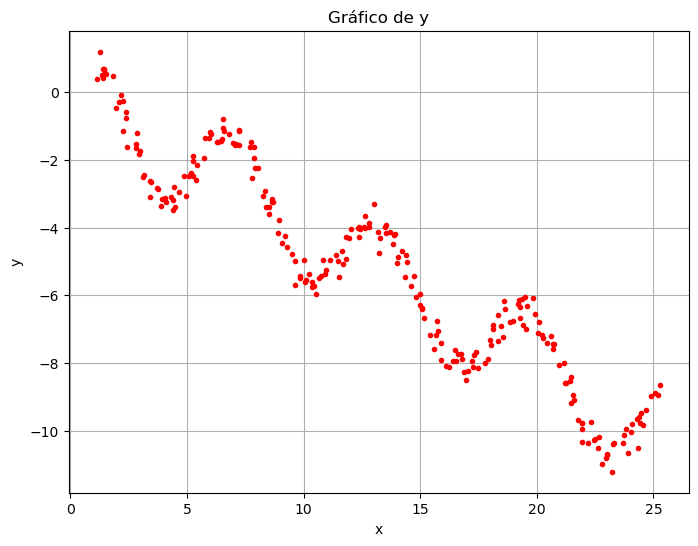

In [2]:
import csv
import matplotlib.pyplot as plt

x_vals = []
y_vals = []

with open('g14data_9b7ddc558100e309f290a85682ba320e.csv', 'r', newline='') as arquivo_csv:
    leitor_csv = csv.reader(arquivo_csv)
    next(leitor_csv) 
    for linha in leitor_csv:
        x_vals.append(float(linha[0]))
        y_vals.append(float(linha[1]))
     

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, 'ro', markersize=3)  
plt.title('Gráfico de y')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Matriz A:
 [[ 5.48134163e+04 -2.02180595e+02  3.25824157e+01]
 [-2.02180595e+02  1.26253319e+02 -3.10063202e+00]
 [ 3.25824157e+01 -3.10063202e+00  1.23746681e+02]]
Matriz B:
 [-22128.52212109    206.16200986    113.27858136]
Matriz dos coeficientes:
 [-0.40057654  1.01714235  1.04636436]
Erro total:
 21.86416113481939


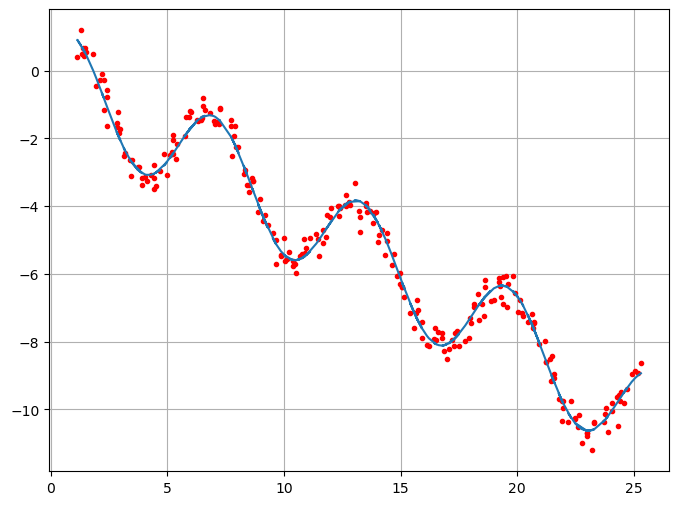

In [6]:
import numpy as np
x = np.array(x_vals)
y = np.array(y_vals)

FB = [lambda x: x, lambda x: np.sin(x), lambda x: np.cos(x)]

dim = len(FB)
A = np.zeros((dim,dim))
B = np.zeros(dim)

for i in range(dim):
    B[i]= np.inner(FB[i](x),y)
    for j in range(dim):
        A[i,j] = np.inner(FB[i](x),FB[j](x))
        
print('Matriz A:\n', A)
print('Matriz B:\n',B)
a = np.linalg.solve(A,B)
print('Matriz dos coeficientes:\n',a)
def g (x):
    gg=0
    for i in range(dim):
        gg+=a[i]*FB[i](x)
    return gg

erro = 0
for i in range (len(x_vals)):
    erro += (g(x)[i]-y_vals[i])**2
    
print('Erro total:\n',erro)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'ro', markersize=3)
plt.plot(x,g(x))
plt.grid(True)
plt.show()